# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [ ]:
from google.colab import files
uploaded = files.upload()

## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [ ]:
file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

In [ ]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [ ]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

## Normalize a Slice
Normalization improves contrast.

In [ ]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

In [ ]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.


In [28]:
import kagglehub
import os
import tarfile

# Download latest version
path = '/root/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1'

print("Path to dataset files:", path)

print("\nFinding .tar files...")
tar_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.tar'):
            tar_files.append(os.path.join(root, file))
            print(f"Found: {file}")

if not tar_files:
    print("ERROR: No .tar files found!")
else:
    print(f"\nFound {len(tar_files)} .tar files")
    
    
    first_tar = tar_files[0]
    extract_dir = os.path.join(path, "extracted")
    os.makedirs(extract_dir, exist_ok=True)
    
    print(f"\nExtracting: {os.path.basename(first_tar)}")
    with tarfile.open(first_tar, 'r') as tar:
        tar.extractall(path=extract_dir)
    print(f"Extracted to: {extract_dir}")
    
    print("\nSearching for .nii.gz files...")
    image_files = []
    for root, dirs, files in os.walk(extract_dir):
        for file in files:
            if file.endswith('.nii.gz'):
                image_files.append(os.path.join(root, file))
    
    print(f"Found {len(image_files)} .nii.gz files")
    
print(type(image_files))

Path to dataset files: /root/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1

Finding .tar files...
Found: BraTS2021_00621.tar
Found: BraTS2021_Training_Data.tar
Found: BraTS2021_00495.tar

Found 3 .tar files

Extracting: BraTS2021_00621.tar
Extracted to: /root/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1/extracted

Searching for .nii.gz files...
Found 5 .nii.gz files
<class 'list'>


/tmp/ipython-input-1368149828.py:30: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_dir)



Loading: BraTS2021_00621_t1ce.nii.gz
<class 'list'>
The two types of data types int16, float64


/tmp/ipython-input-4252455346.py:8: RuntimeWarning: invalid value encountered in divide
  slice = (slice - np.min(slice))/ np.max(slice) - np.min(slice)


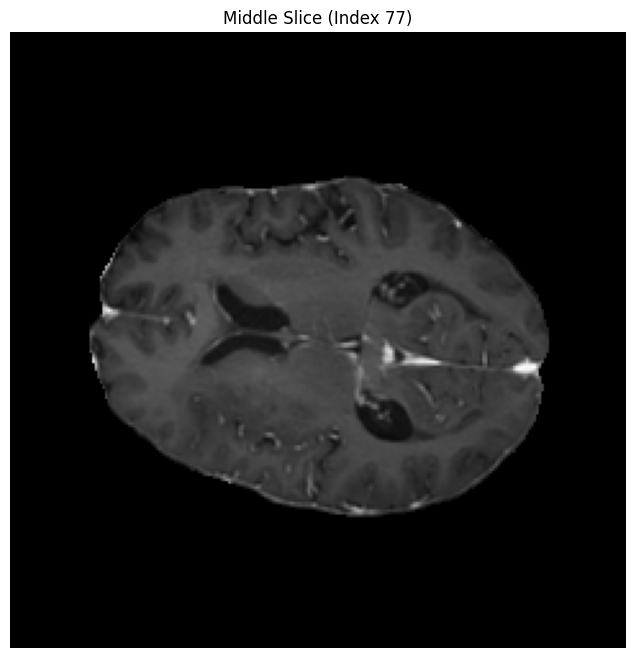

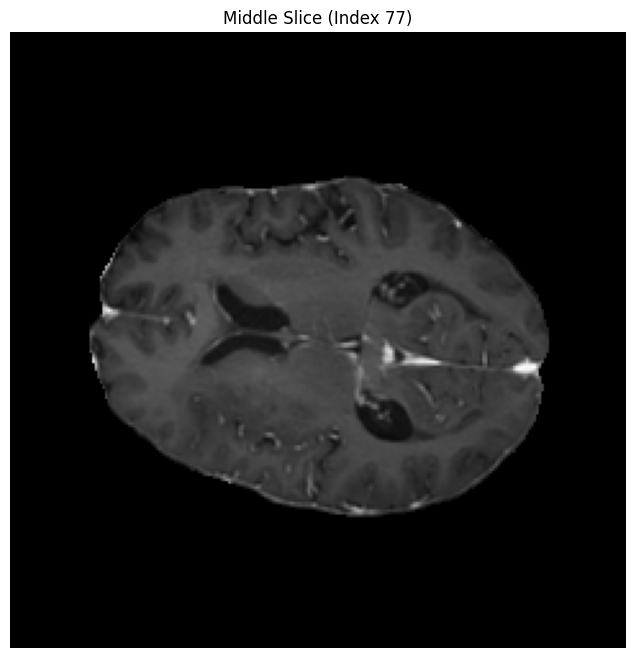

In [51]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def normalize_slices (data):
    for slice in data:
        slice = (slice - np.min(slice))/ np.max(slice) - np.min(slice)
    return data

def plot_aslice (data,slice):
    plt.figure(figsize=(8, 8))
    plt.imshow(data[:,:,slice], cmap="gray")  
    plt.title(f"Middle Slice (Index {slice})")
    plt.axis("off")
    plt.show()

def resize_slices (data):
    for slice in data : 
        tf.image.resize(slice[..., None],(128,128))
    return data
    
first_image_path = image_files[0]
print(f"\nLoading: {os.path.basename(first_image_path)}")
print(type(image_files))

img = nib.load(first_image_path)            # we have to load the data cuz of the reason in doc
data = img.get_fdata()                      
print(f"The two types of data types {img.get_data_dtype()}, {img.get_fdata().dtype}")

slice_index = data.shape[2] // 2            # taking a single slice in this case the middle one 

normalised_data = normalize_slices(data)

plot_aslice(data, slice_index)

resized_slices = resize_slices(data)

plot_aslice(resized_slices, slice_index)